In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import re
from numpy import linalg as LA
from time import time
from scipy import sparse
import matplotlib.pyplot as plt

/home/nivedita/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


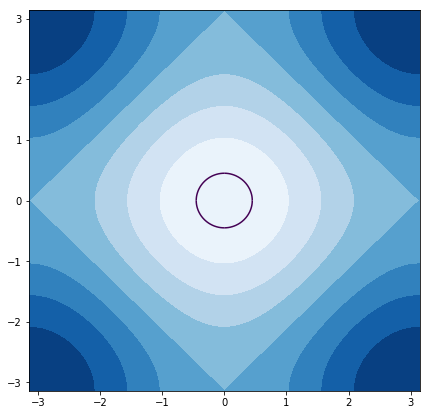

In [3]:
N=100
kx=np.linspace(0,np.pi,N)
ky=np.linspace(0,np.pi,N)
plt.rcParams['figure.figsize'] = [7,7]
Kx,Ky=np.meshgrid(kx,ky)
E=-2*(np.cos(Kx)+np.cos(Ky))
E_F=-3.8
CS=plt.contour(kx,ky,E,levels=[E_F],color='red')
plt.contour(-kx,ky,E,levels=[E_F],color='red')
plt.contour(-kx,-ky,E,levels=[E_F],color='red')
plt.contour(kx,-ky,E,levels=[E_F],color='red')
plt.contourf(kx,ky,E,cmap='Blues')
plt.contourf(-kx,ky,E,cmap='Blues')
plt.contourf(-kx,-ky,E,cmap='Blues')
plt.contourf(kx,-ky,E,cmap='Blues')
F = CS.collections[0].get_paths()[0]
coordsF = F.vertices
vF = np.dstack([2*np.sin(coordsF[:,0]),2*np.sin(coordsF[:,1])])[0]
vFmag = vF[:,0]*vF[:,0]+vF[:,1]*vF[:,1]
shatF  = vF/np.transpose([vFmag])
thetaF0 =  np.float64(np.arctan((vF[:,1]+1e-2)/(vF[:,0]+1e-2))) 
coordsFx_irr = coordsF[:,0]
coordsFy_irr = coordsF[:,1]
Lambda0=np.pi/(2*np.sqrt(2))
steps=30000 #30000
eps=(1-1/(N*N)) #0.9999
lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))

In [36]:
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)

In [37]:
EFwvfAvg

array([-1.90793625, -1.9081885 , -1.90844072, ..., -3.7488182 ,
       -3.74882362, -3.74882903])

In [38]:
J0=1/(N*N)#1.19e9/(N*N)#5e-3/(N*N)
J=np.zeros(steps)
J[0]=J0
omega=4 #1/2 of bandwidth in 2D

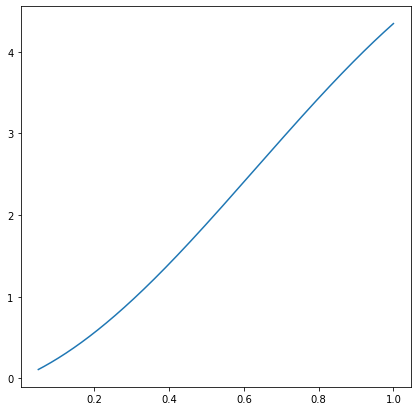

In [10]:
plt.plot(lambdaF/Lambda0,EFwvfAvg-E_F)

In [143]:
k=0
for i in range(len(lambdaF)-1):
    Ek=EFwvfAvg[i]-E_F
    if(Ek-J[0]/4>0):
        if(Ek-J[i]/4>0):

            J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
        else:
            J[i:]=4*Ek
            k=i
            break
    else:
        if(Ek-J[i]/4<0):

            J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
        else:
            J[i:]=4*Ek
            k=i
            break
    

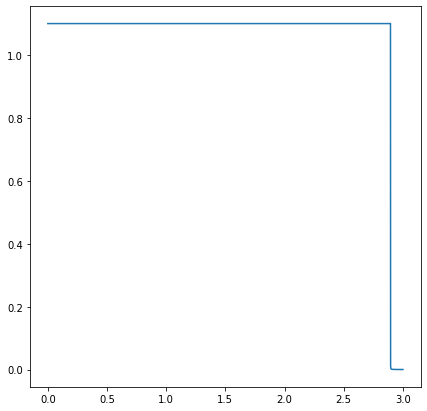

In [144]:
plt.plot(-np.log(lambdaF/Lambda0),J[::-1])

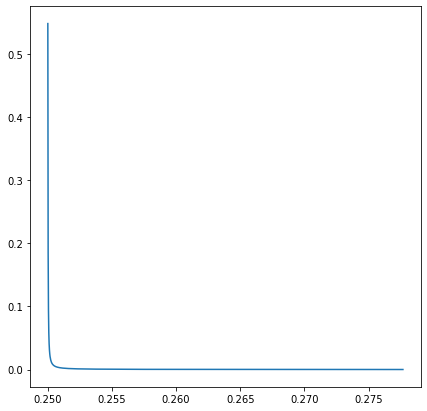

In [164]:
figure,ax=plt.subplots(1)
ax.plot(lambdaF[0:1051],J[0:1051])

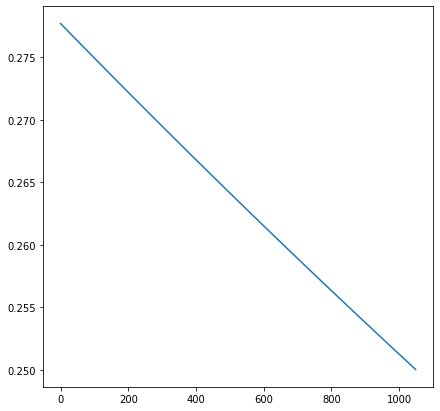

In [153]:
plt.plot(lambdaF[0:1050])

## $Regime-1: J_{0}= 5\times 10^{-3}t$ to $7\times 10^{-3}t$

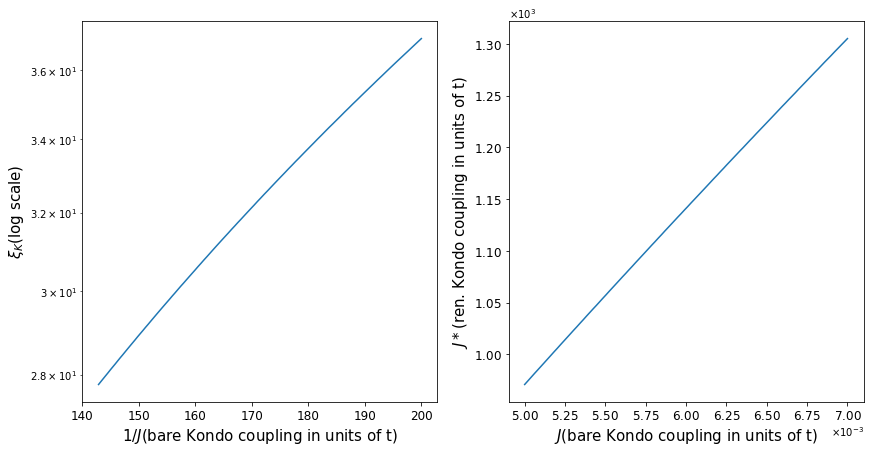

In [33]:
J0arr=np.linspace(5e-3,7e-3,100)
LambdaFParr=0.0*J0arr
JfixedArr=0.0*J0arr
omega=0.0
for J_0 in J0arr:
    J=np.zeros(steps)
    J[0]=J_0/(N*N)
    k=0
    for i in range(len(lambdaF)-1):
        Ek=EFwvfAvg[i]-E_F
        if(Ek-J[0]/4>0):
            if(Ek-J[i]/4.>0):
                J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break
        else:
            if(Ek-J[i]/4<0):

                J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break  
    LambdaFParr[J0arr==J_0]=lambdaF[k]/Lambda0            

figure,ax=plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [14,7]
ax[0].set_yscale('log')
ax[0].plot(1/J0arr,1/(LambdaFParr*Lambda0),label='URG')
ax[0].tick_params(labelsize='large')
ax[0].set_xlabel(r'$1/J$(bare Kondo coupling in units of t)',fontsize=15)
ax[0].set_ylabel(r'$\xi_{K}$(log scale)',fontsize=15)
ax[1].ticklabel_format(style='sci',useMathText=True,scilimits=(1,2))
ax[1].tick_params(labelsize='large')
ax[1].plot(J0arr,JfixedArr*N*N,label='URG')
ax[1].set_xlabel(r'$J$(bare Kondo coupling in units of t)',fontsize=15)
ax[1].set_ylabel(r'$J*$(ren. Kondo coupling in units of t)',fontsize=15)
plt.savefig('KondoRegime1.png')

## $Regime-2: J_{0}= 7\times 10^{-3}t$ to $t$

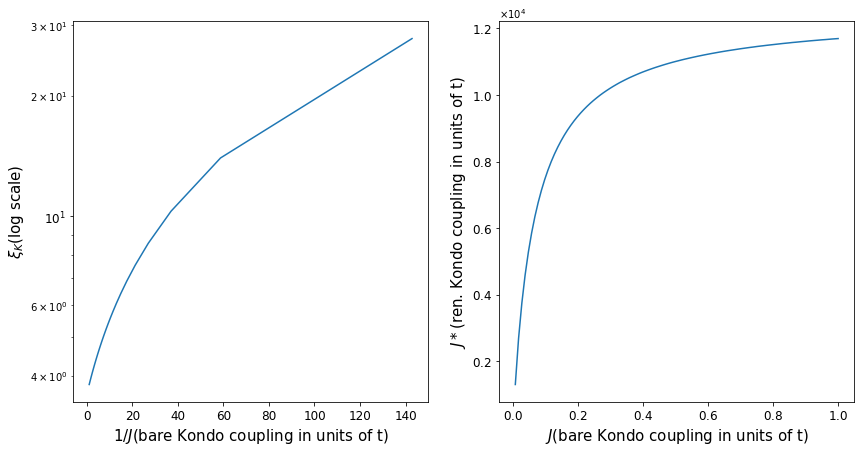

In [450]:
J0arr=np.linspace(7e-3,1,100)
LambdaFParr=0.0*J0arr
JfixedArr=0.0*J0arr
omega=0.0
for J_0 in J0arr:
    J=np.zeros(steps)
    J[0]=J_0/(N*N)
    k=0
    for i in range(len(lambdaF)-1):
        Ek=EFwvfAvg[i]-E_F
        if(Ek-J[0]/4>0):
            if(Ek-J[i]/4.>0):
                J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break
        else:
            if(Ek-J[i]/4<0):

                J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break  
    LambdaFParr[J0arr==J_0]=lambdaF[k]/Lambda0            

figure,ax=plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [14,7]
ax[0].set_yscale('log')
ax[0].plot(1/J0arr,1/(LambdaFParr*Lambda0),label='URG')
ax[0].tick_params(labelsize='large')
ax[0].set_xlabel(r'$1/J$(bare Kondo coupling in units of t)',fontsize=15)
ax[0].set_ylabel(r'$\xi_{K}$(log scale)',fontsize=15)
ax[1].ticklabel_format(style='sci',useMathText=True,scilimits=(1,2))
ax[1].tick_params(labelsize='large')
ax[1].plot(J0arr,JfixedArr*N*N,label='URG')
ax[1].set_xlabel(r'$J$(bare Kondo coupling in units of t)',fontsize=15)
ax[1].set_ylabel(r'$J*$(ren. Kondo coupling in units of t)',fontsize=15)
plt.savefig('KondoRegime2.svg')

## $Regime-3: J_{0}= t$ to $10t$

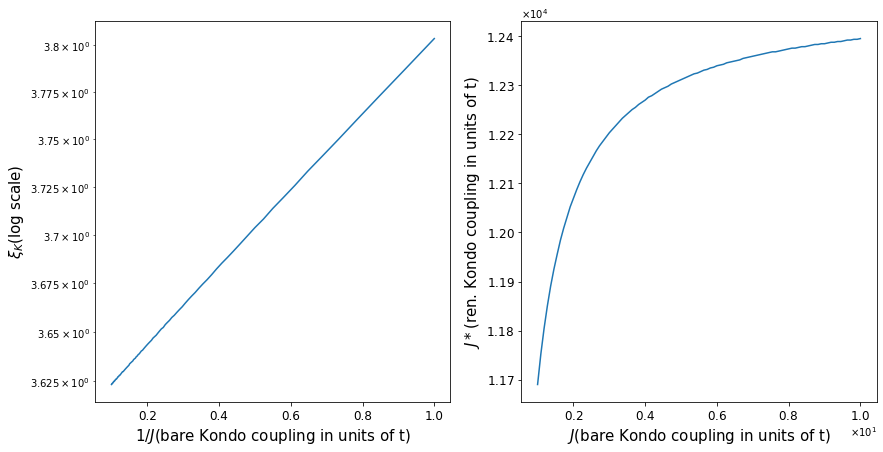

In [452]:
J0arr=np.linspace(1,10,100)
LambdaFParr=0.0*J0arr
JfixedArr=0.0*J0arr
omega=0.0
for J_0 in J0arr:
    J=np.zeros(steps)
    J[0]=J_0/(N*N)
    k=0
    for i in range(len(lambdaF)-1):
        Ek=EFwvfAvg[i]-E_F
        if(Ek-J[0]/4>0):
            if(Ek-J[i]/4.>0):
                J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break
        else:
            if(Ek-J[i]/4<0):

                J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
            else:
                JfixedArr[J0arr==J_0]=4*Ek
                k=i
                J[i:]=4*Ek
                break  
    LambdaFParr[J0arr==J_0]=lambdaF[k]/Lambda0            
#J0arr=np.linspace(7e-3,1,100)
figure,ax=plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [14,7]
ax[0].set_yscale('log')
ax[0].plot(1/J0arr,1/(LambdaFParr*Lambda0),label='URG')
ax[0].tick_params(labelsize='large')
ax[0].set_xlabel(r'$1/J$(bare Kondo coupling in units of t)',fontsize=15)
ax[0].set_ylabel(r'$\xi_{K}$(log scale)',fontsize=15)
ax[1].ticklabel_format(style='sci',useMathText=True,scilimits=(1,2))
ax[1].tick_params(labelsize='large')
ax[1].plot(J0arr,JfixedArr*N*N,label='URG')
ax[1].set_xlabel(r'$J$(bare Kondo coupling in units of t)',fontsize=15)
ax[1].set_ylabel(r'$J*$(ren. Kondo coupling in units of t)',fontsize=15)
plt.savefig('KondoRegime3.svg')

In [44]:
np.linspace(0,6,7)

array([0., 1., 2., 3., 4., 5., 6.])

In [171]:
4.9*10**(-3)*1.02656**820

10601154.997503908

In [48]:
np.zeros([7,len(J0arr)])[:,0]

array([0., 0., 0., 0., 0., 0., 0.])

In [53]:
4.9e-3*(1.02656)**np.linspace(50,600,600)

array([1.81724288e-02, 1.86151286e-02, 1.90686131e-02, 1.95331449e-02,
       2.00089932e-02, 2.04964337e-02, 2.09957487e-02, 2.15072276e-02,
       2.20311667e-02, 2.25678694e-02, 2.31176469e-02, 2.36808175e-02,
       2.42577075e-02, 2.48486512e-02, 2.54539909e-02, 2.60740774e-02,
       2.67092698e-02, 2.73599362e-02, 2.80264535e-02, 2.87092078e-02,
       2.94085948e-02, 3.01250197e-02, 3.08588974e-02, 3.16106531e-02,
       3.23807224e-02, 3.31695514e-02, 3.39775972e-02, 3.48053278e-02,
       3.56532228e-02, 3.65217734e-02, 3.74114829e-02, 3.83228666e-02,
       3.92564527e-02, 4.02127818e-02, 4.11924082e-02, 4.21958993e-02,
       4.32238366e-02, 4.42768154e-02, 4.53554460e-02, 4.64603532e-02,
       4.75921771e-02, 4.87515734e-02, 4.99392139e-02, 5.11557865e-02,
       5.24019962e-02, 5.36785649e-02, 5.49862321e-02, 5.63257555e-02,
       5.76979112e-02, 5.91034940e-02, 6.05433183e-02, 6.20182183e-02,
       6.35290484e-02, 6.50766840e-02, 6.66620216e-02, 6.82859798e-02,
      

In [61]:
from tqdm import tqdm
#URG
factor=10**np.linspace(0,6,7)
J0arr=4.9e-3*(1.02656)**np.linspace(50,600,600)#np.concatenate([np.concatenate([np.linspace(5e-3,1,100),np.linspace(1.1,0.9e8,1000)]),np.linspace(1e8,1.15e9,10000)])
LambdaFParr=np.zeros([7,len(J0arr)])
JfixedArr=np.zeros([7,len(J0arr)])
omega=0.0
Jmax=np.zeros(7)
for f in range(1):
    for J_0 in tqdm(J0arr):
        #print(np.where(J0arr==J_0))
        J=np.zeros(steps)
        J[0]=J_0/(N*N)
        k=0
        for i in range(len(lambdaF)-1):
            Ek=(EFwvfAvg[i]-E_F)*factor[f]
            if(Ek-J[0]/4>0):
                if(Ek-J[i]/4.>0):
                    J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
                else:
                    JfixedArr[f][J0arr==J_0]=4*Ek
                    k=i
                    J[i:]=4*Ek
                    break
            else:
                if(Ek-J[i]/4<0):

                    J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
                else:
                    JfixedArr[f][J0arr==J_0]=4*Ek
                    k=i
                    J[i:]=4*Ek
                    break       

        LambdaFParr[f][J0arr==J_0]=lambdaF[k]/Lambda0        


100%|██████████| 600/600 [00:11<00:00, 52.25it/s] 


In [79]:
JfixedMax=np.asarray([JfixedArr[f].max() for f in range(len(factor))])*N*N

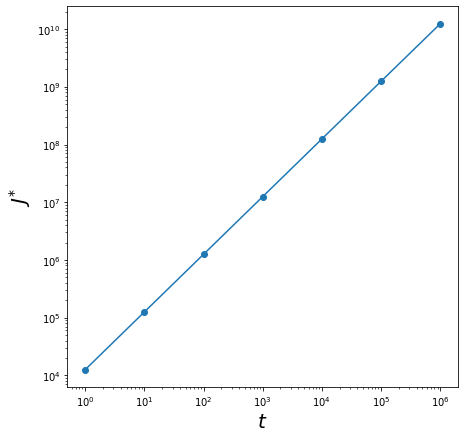

In [129]:
figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] = [7,7]
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(factor,JfixedMax,marker='o')
ax.set_xlabel(r'$t$',fontsize=20)
ax.set_ylabel(r'$J^{*}$',fontsize=20)
plt.savefig('KondoCouplingVst.svg')

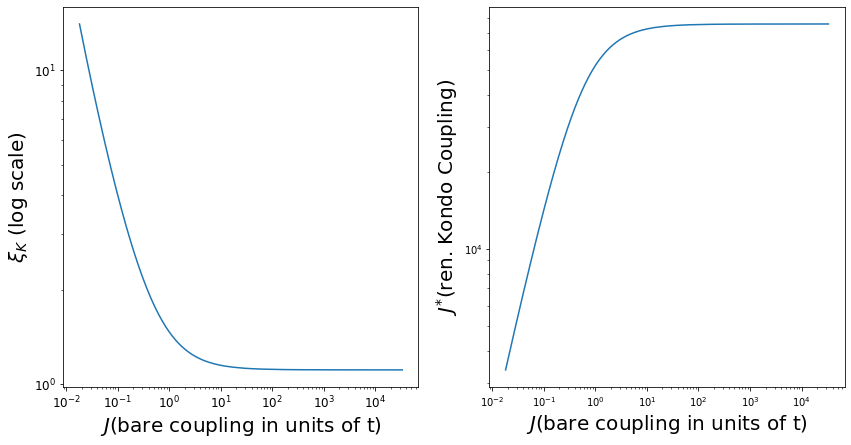

In [69]:
figure,ax=plt.subplots(1,2)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
plt.rcParams['figure.figsize'] = [14,7]
ax[0].plot(J0arr,1/(LambdaFParr[0]/Lambda0),label='URG')
ax[0].tick_params(labelsize='large')
ax[0].set_xlabel(r'$J$(bare coupling in units of t)',fontsize=20)
ax[0].set_ylabel(r'$\xi_{K}~$(log scale)',fontsize=20)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].plot(J0arr,JfixedArr[0]*N*N,label='URG')
#ax[1].plot(J0arr[0:820],JfixedArr[0:820]*N*N,label='URG')
#plt.rcParams['figure.figsize'] = [14,7]
ax[1].set_xlabel(r'$J$(bare coupling in units of t)',fontsize=20)
ax[1].set_ylabel(r'$J^{*}$(ren. Kondo Coupling)',fontsize=20)
#ax.set_yticks(np.arange(1,7, 1.0))
plt.savefig('KondoComplete.svg')

In [59]:
J0arr

array([1.81724288e-02, 1.86151286e-02, 1.90686131e-02, 1.95331449e-02,
       2.00089932e-02, 2.04964337e-02, 2.09957487e-02, 2.15072276e-02,
       2.20311667e-02, 2.25678694e-02, 2.31176469e-02, 2.36808175e-02,
       2.42577075e-02, 2.48486512e-02, 2.54539909e-02, 2.60740774e-02,
       2.67092698e-02, 2.73599362e-02, 2.80264535e-02, 2.87092078e-02,
       2.94085948e-02, 3.01250197e-02, 3.08588974e-02, 3.16106531e-02,
       3.23807224e-02, 3.31695514e-02, 3.39775972e-02, 3.48053278e-02,
       3.56532228e-02, 3.65217734e-02, 3.74114829e-02, 3.83228666e-02,
       3.92564527e-02, 4.02127818e-02, 4.11924082e-02, 4.21958993e-02,
       4.32238366e-02, 4.42768154e-02, 4.53554460e-02, 4.64603532e-02,
       4.75921771e-02, 4.87515734e-02, 4.99392139e-02, 5.11557865e-02,
       5.24019962e-02, 5.36785649e-02, 5.49862321e-02, 5.63257555e-02,
       5.76979112e-02, 5.91034940e-02, 6.05433183e-02, 6.20182183e-02,
       6.35290484e-02, 6.50766840e-02, 6.66620216e-02, 6.82859798e-02,
      

In [66]:
Lambda0/LambdaFParr[0][35:]

array([7.25363659, 7.12565785, 7.00063715, 6.87780996, 6.75848942,
       6.6405748 , 6.52602257, 6.4134464 , 6.30344255, 6.19594509,
       6.09028087, 5.98701732, 5.88550466, 5.78687051, 5.68988934,
       5.59509298, 5.50187597, 5.41075308, 5.32167155, 5.2345801 ,
       5.14891393, 5.06566281, 4.98325938, 4.90317699, 4.82486403,
       4.74780188, 4.67243781, 4.59827002, 4.52618472, 4.45522948,
       4.38582515, 4.31793382, 4.25151857, 4.18612487, 4.12256148,
       4.05996326, 3.99871542, 3.93839155, 3.87975363, 3.82198876,
       3.76583706, 3.71051034, 3.65636209, 3.60300404, 3.55113485,
       3.50036241, 3.45031589, 3.40166521, 3.35370052, 3.30674282,
       3.2607687 , 3.21575533, 3.17168052, 3.12852264, 3.08595203,
       3.04456957, 3.00404245, 2.96405479, 2.92518443, 2.88682382,
       2.84953614, 2.81273009, 2.77667711, 2.74163455, 2.70703424,
       2.67313791, 2.64019402, 2.60765614, 2.57577684, 2.5447962 ,
       2.51418819, 2.48419674, 2.45505404, 2.42625322, 2.39826

In [11]:
J=np.zeros(steps)
J_0=20
J[0]=J_0/(N*N)
k=0
for i in range(len(lambdaF)-1):
    Ek=(EFwvfAvg[i]-E_F)
    if(Ek-J[0]/4>0):
        if(Ek-J[i]/4.>0):
            J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
        else:
            Jfixed=4*Ek
            k=i
            J[i:]=4*Ek
            break
    else:
        if(Ek-J[i]/4<0):
            J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
        else:
            Jfixed=4*Ek
            k=i
            J[i:]=4*Ek
            break       
        

In [12]:
J[k]

16.738797816125086

In [13]:
Jfixed,k

(16.738797816125086, 387)

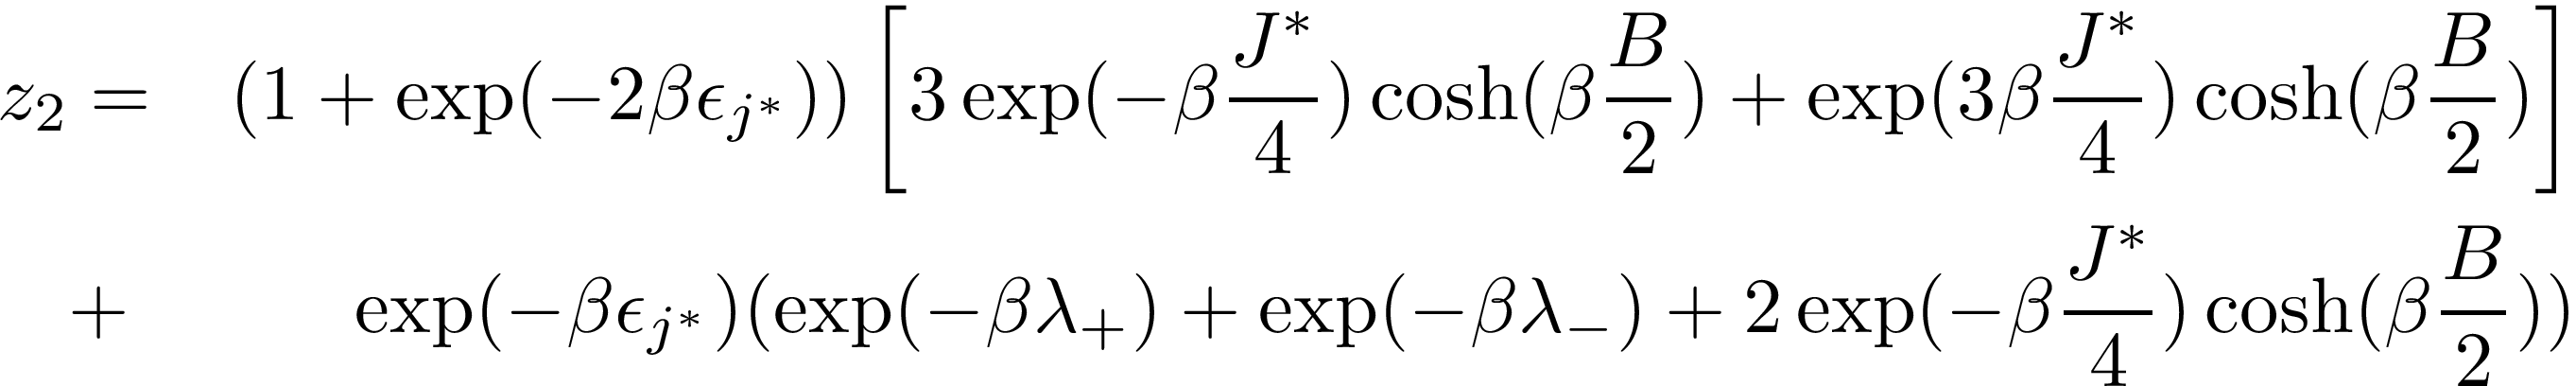

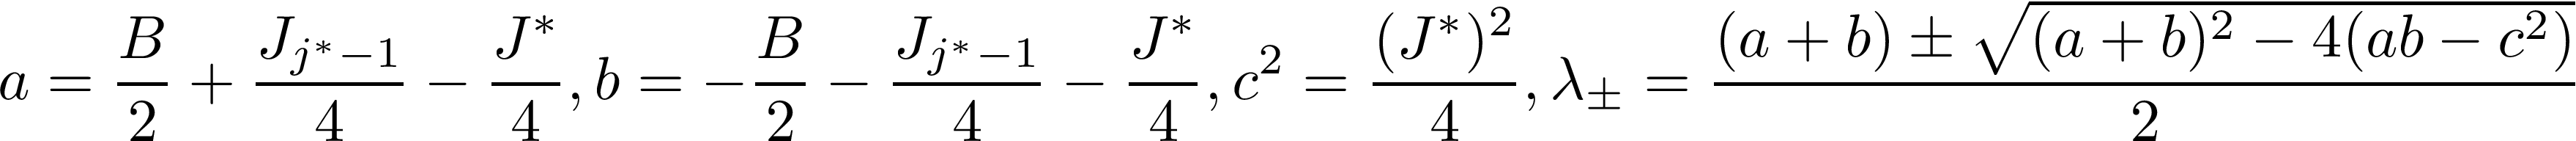

In [368]:
'''
B=np.linspace(1e-5,1e-2,3000)#magnetic field
Temp=np.linspace(1e-2,1,10000)#in kelvin
Jstar=Jfixed#magnitude of Kondo coupling at IR fixed point
Ekstar=EFwvfAvg[k]-E_F#magnitude of the dispersion for the boundary shell of the Kondo cloud
Bmesh,Tmesh=np.meshgrid(B,Temp)
kB=1
a=Bmesh/2.-Jstar/4#B/2.+J[k-2]/4-Jstar/4
b=-Bmesh/2.-Jstar/4#-B/2.-J[k-2]/4-Jstar/4#net magnitude of the polarizing field emerging from external magnetic field and the decoupled local Fermi liquid
c=Jstar/2.
E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
'''
B=np.linspace(1e-3,2e-3,50)
Temp=np.linspace(0.008,20,10000)#np.linspace(0.008,5,10000)
kB=1
Jstar=Jfixed
Bmesh,Tmesh=np.meshgrid(B,Temp)
a=Bmesh/2.+J[k-20]/4-Jstar/4.
b=-Bmesh/2.-J[k-20]/4-Jstar/4.
c=Jfixed/2.
E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))

In [14]:
Tk=(EFwvfAvg-E_F).max()*lambdaF[k]/Lambda0

In [15]:
Tk

4.1784189388452875

In [875]:
Z=np.exp(-E1/(kB*Tmesh))+np.exp(-E2/(kB*Tmesh))+2*np.exp(-(Jstar/4)/(kB*Tmesh))*np.cosh(Bmesh/(2*kB*Tmesh))

In [876]:
magnetization=kB*Tmesh*(np.gradient(Z,B,axis=1)/Z)

In [877]:
susceptibility=np.gradient(magnetization,B,axis=1)

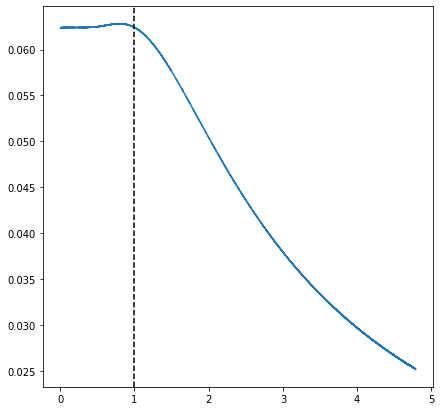

In [881]:
figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] = [7,7]
#ax.set_yscale('log')
#ax.plot(Temp/Tk,magnetization[:,0])
ax.plot(Temp/Tk,(susceptibility[:,0]*Tk))
ax.axvline(x=1,linestyle='--',color='k')

In [180]:
#Computing Specific heat

In [463]:
b=(2-0.2)/10000
(4-0.2)*(1/b)

21111.11111111111

In [464]:
#Temp=np.linspace(0.2,4,20000)
Temp=np.linspace(0.0005,5,40000)#np.linspace(0.0005,5,20000)#np.linspace(0.0005,5,900000)
a=+J[k-20]/4-Jstar/4.
b=-J[k-20]/4-Jstar/4.
c=Jfixed/2.
Ekstar=EFwvfAvg[k]-E_F
E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
Z=(np.exp(-E1/(kB*Temp))+np.exp(-E2/(kB*Temp))+2*np.exp(-(Jstar/4)/(kB*Temp)))#np.exp(-Ekstar/(kB*Temp))*(np.exp(-E1/(kB*Temp))+np.exp(-E2/(kB*Temp))+2*np.exp(-(Jstar/4)/(kB*Temp)))
#+(1+np.exp(-2*Ekstar/(kB*Temp)))*(3*np.exp(-(Jstar/4)/(kB*Temp))+np.exp(-(3*Jstar/4.)/(kB*Temp)))#partition function at zero magnetic field

In [465]:
Z_0=np.exp(-(EFwvfAvg[k]-E_F)/(kB*Temp))+1+np.exp(-2*(EFwvfAvg[k]-E_F)/(kB*Temp))

In [466]:
C0=np.gradient(Temp*Temp*np.gradient(np.log(Z_0),Temp),Temp)

In [467]:
C0

array([0.        , 0.        , 0.        , ..., 0.3372453 , 0.46159343,
       0.58594736])

In [468]:
C=np.gradient(Temp*Temp*np.gradient(np.log(Z),Temp),Temp)

/home/neo/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:1084: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0


In [470]:
[print(C[i]) for i in range(len(C))]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
inf
0.06728712488984456
0.0659043841296807
0.06455927308707032
0.06325052263855468
0.06197690964472713
0.06073726033355342
0.05953045521164313
0.05835541319538606
0.05721109276782954
0.056096497224643826
0.055010669864714146
0.05395268619759008
0.05292166009894572
0.05191674062371021
0.05093710347864544
0.049981957527052145
0.049050545967475045
0.04814213446661597
0.04725601779500721
0.046391516632866114
0.04554797199671157
0.04472475696093

2.955901436507702e-06
2.9344300855882466e-06
2.982844307553023e-06
2.9782240744680166e-06
2.918495738413185e-06
2.93805351248011e-06
2.9742150218226016e-06
2.964196028187871e-06
2.920845872722566e-06
2.933054929599166e-06
2.9528819140978158e-06
2.947577740997076e-06
2.929802576545626e-06
2.9427537810988724e-06
2.938060788437724e-06
2.913177013397217e-06
2.92615732178092e-06
2.9133661882951856e-06
2.9176590032875538e-06
2.9361763154156506e-06
2.935325028374791e-06
2.9120856197550893e-06
2.9244620236568153e-06
2.9080547392368317e-06
2.9056245693936944e-06
2.898465027101338e-06
2.913933712989092e-06
2.9178409022279084e-06
2.860826498363167e-06
2.907865564338863e-06
2.9327566153369844e-06
2.88570299744606e-06
2.8857539291493595e-06
2.8829890652559698e-06
2.8889990062452853e-06
2.8843714972026646e-06
2.880573447328061e-06
2.9042421374469995e-06
2.874316123779863e-06
2.8481226763688028e-06
2.8985741664655507e-06
2.9288275982253253e-06
2.8727372409775853e-06
2.818378561642021e-06
2.8539943741

2.6016765332315117e-05
2.606583439046517e-05
2.6082016120199114e-05
2.6176836399827152e-05
2.624563785502687e-05
2.631889219628647e-05
2.6372901629656553e-05
2.6330046239309013e-05
2.635586861288175e-05
2.648092049639672e-05
2.6600428100209683e-05
2.6609530323185027e-05
2.6646957849152386e-05
2.666188811417669e-05
2.6711946702562273e-05
2.6827612600754946e-05
2.687689266167581e-05
2.6890156732406467e-05
2.6870809961110353e-05
2.6984977012034506e-05
2.7127593057230115e-05
2.7112131647299975e-05
2.7131871320307255e-05
2.7244503144174814e-05
2.7317728381603956e-05
2.7273359592072666e-05
2.7304922696202993e-05
2.744297671597451e-05
2.7527967176865786e-05
2.7563146431930363e-05
2.7579095331020653e-05
2.7606314688455313e-05
2.770267747109756e-05
2.7789879823103547e-05
2.781691000564024e-05
2.7814225177280605e-05
2.7921465516556054e-05
2.797847264446318e-05
2.798869536491111e-05
2.809164288919419e-05
2.812722959788516e-05
2.8180511435493827e-05
2.822763053700328e-05
2.8299175028223544e-05
2.8

0.0027581294198171236
0.0027606189396465197
0.002762993681244552
0.0027653685392579064
0.0027678014230332337
0.002770350249193143
0.002772730149445124
0.002775170411041472
0.002777786081423983
0.002780177950626239
0.0027825753059005365
0.0027852076600538567
0.002787675512081478
0.0027899795895791613
0.0027924638270633295
0.0027949573850492015
0.0027974610493401997
0.0027999756057397462
0.002802387301926501
0.0028049258908140473
0.0028074203510186635
0.0028099287883378565
0.0028124518794356845
0.002814761217450723
0.0028172586316941306
0.002819887660734821
0.002822362475853879
0.0028247984446352348
0.002827368334692437
0.0028299008918111213
0.002832339538144879
0.0028347422703518532
0.0028372246379149146
0.0028399023140082136
0.0028424316333257593
0.0028447558215702884
0.002847277581167873
0.002849940341548063
0.0028524576846393757
0.0028548877162393183
0.0028573460585903376
0.0028600060250028037
0.0028625234408536926
0.002864899011910893
0.0028675935172941536
0.0028700901530100964
0.00

0.02470734501548577
0.024719543078390416
0.024731809404329397
0.024744382666540332
0.024756690851063468
0.024768972645688336
0.024781466992862988
0.024793792334094178
0.024806092165817972
0.024818653117108624
0.024830998161633033
0.024843366212735418
0.024855805313563906
0.024868172469723504
0.024880515717086382
0.024892978624848183
0.024905561542254873
0.024917930219089612
0.024930180465162266
0.02494264711276628
0.02495523491234053
0.024967657278466504
0.024979962239740416
0.024992436985485256
0.025005034054629505
0.02501741881860653
0.025029830787389074
0.02504246159514878
0.025054880847164895
0.02506718446238665
0.025079707862460054
0.025092259798839223
0.02510474479640834
0.025117258926911745
0.025129754554654937
0.02514227982464945
0.025154787123028655
0.025167180843709502
0.025179700904118363
0.02519234759529354
0.025204785641108174
0.025217302929377183
0.02522994773607934
0.02524238460318884
0.025254949534428306
0.025267546872782987
0.02527998500590911
0.025292600053944625
0.02

0.09935626148217125
0.099386292960844
0.09941592155519174
0.09944551889202558
0.09947508481855039
0.09950424807175295
0.09953427207074128
0.09956404214608483
0.0995932611040189
0.09962326710956404
0.09965294506400824
0.09968229518563021
0.09971206096088281
0.09974164776213001
0.09977142757270485
0.09980102848203387
0.09983045063563623
0.09986043821118074
0.09989009839046048
0.09991965456720209
0.09994940440810751
0.09997905045747757
0.10000889057118911
0.1000384036306059
0.10006818546389695
0.10009801280830288
0.10012728990113828
0.10015728310827399
0.10018717312050285
0.10021666216198355
0.10024671887367731
0.1002763001160929
0.10030585314962082
0.10033582528558327
0.10036547123308992
0.10039523844170617
0.10042497776885284
0.10045461490517482
0.10048474656650797
0.10051440323150018
0.10054373414459405
0.10057400767982472
0.10060395563778002
0.10063342895591632
0.10066324836952845
0.10069296635629144
0.10072288162336918
0.100752770267718
0.1007824084663298
0.100812468364893
0.10084235

0.25832806940888986
0.2583740493428195
0.25841936580400215
0.2584658122432302
0.25851159512239974
0.2585573872420355
0.25860352482413873
0.25864922317123273
0.2586953794088913
0.2587414328518207
0.2587871592040756
0.2588331193619524
0.2588788645443856
0.2589249559532618
0.25897105688636657
0.25901671865722165
0.25906283900985727
0.2591086323518539
0.2591544354945654
0.2592009220679756
0.25924674489942845
0.25929269007610856
0.2593385328000295
0.25938416101416806
0.25943092240049737
0.25947668309527216
0.25952211700496264
0.25956857214623597
0.25961436345096445
0.25966027755930554
0.259706539043691
0.25975236152589787
0.2597985316897393
0.25984448755480116
0.25989011674391804
0.2599364311390673
0.25998253127909265
0.2600284173968248
0.2600744266528636
0.26011999688489595
0.26016659025481204
0.2602127446371014
0.2602581226165057
0.26030463658389635
0.2603505990555277
0.2603963477013167
0.2604426700709155
0.26048855354019906
0.2605347860007896
0.2605808046209859
0.26062660948809935
0.2606

0.40040195962501457
0.4004520397138549
0.4005030465996242
0.40055397655669367
0.4006046145732398
0.400655606026703
0.4007059468640364
0.40075664124742616
0.40080733049398987
0.4008578712819144
0.4009091245025047
0.4009597270123777
0.4010101093517733
0.40106106083112536
0.40111164856352843
0.40116251858125906
0.40121331194677623
0.4012635980689083
0.4013147408622899
0.4013656635361258
0.40141593536827713
0.4014668487216113
0.4015173983134446
0.40156823062716285
0.40161934556090273
0.4016695940808859
0.4017204127085279
0.4017711549095111
0.40182160528638633
0.4018728415903752
0.40192349861899856
0.40197407948289765
0.4020249433160643
0.40207529974577483
0.40212637067452306
0.40217714977188734
0.402227493301325
0.4022786234418163
0.4023293898862903
0.40238015225622803
0.4024307665749802
0.40248101722681895
0.40253219877922675
0.4025829446836724
0.402633614721708
0.4026847123968764
0.4027349427342415
0.40278574478725204
0.4028367587379762
0.4028871931732283
0.4029382715016254
0.40298905810

0.605501707905205
0.6055499630965642
0.6055974438349949
0.6056457981758285
0.6056937657413073
0.605741346560535
0.6057897042410332
0.6058374811618705
0.6058855502487859
0.605933717401058
0.6059813038082211
0.6060296674259007
0.606077547177847
0.6061249430640601
0.6061733104070299
0.6062213878904004
0.6062694667489268
0.6063172556750942
0.6063648518320406
0.6064132257306483
0.6064611156471074
0.6065088127725176
0.6065569966740441
0.6066049877554178
0.6066529802992591
0.6067008770987741
0.6067483869192074
0.6067965779366205
0.6068447704019491
0.6068923816419556
0.6069404800291522
0.6069883855961962
0.6070362927566748
0.607084395691345
0.6071318201138638
0.6071800234130933
0.6072283254397917
0.6072757545334753
0.6073237683303887
0.6073717837061849
0.6074196064291755
0.6074675279305666
0.6075154511490837
0.607563570527418
0.607611302715668
0.6076589393705945
0.6077072584594134
0.6077549958135933
0.6078026377581409
0.6078509621875128
0.6078987049331772
0.6079465467846603
0.6079944876983063


0.7429738879436627
0.7430147319173557
0.743055503211508
0.7430962019279832
0.7431373019353487
0.7431777369783958
0.7432189289320377
0.743259929738997
0.7433002655525343
0.7433411212696228
0.7433816674092668
0.7434229707359918
0.7434639644416166
0.7435042929500923
0.7435450230696006
0.7435856806623633
0.7436272143022506
0.7436678454250796
0.7437078112125164
0.7437490087977494
0.7437900153672672
0.7438304750830866
0.7438715739990585
0.7439123631411348
0.7439526054004091
0.7439936055234284
0.7440342959380359
0.7440752699039876
0.744116052708705
0.7441566444904311
0.7441975197943975
0.7442379666754277
0.7442790532513754
0.744319830009772
0.7443601783015765
0.7444010476465337
0.7444418446466443
0.7444823318219278
0.7445235777340713
0.7445640388104948
0.7446044276075554
0.7446456938996562
0.7446859378906083
0.744727059660363
0.7447677527015912
0.7448080171670881
0.7448489218804752
0.7448895167326555
0.7449303957109805
0.7449710835207952
0.7450118178749108
0.7450524799205596
0.745092832010414

0.8779008339261054
0.8779296632637852
0.8779590322301374
0.8779887925629737
0.8780174606654327
0.8780465201270999
0.8780759709698032
0.8781047745942487
0.8781341180947493
0.878163111032336
0.8781920502733556
0.8782213810263784
0.8782502128597116
0.8782792878264445
0.8783090513534262
0.8783377220170223
0.8783664874790702
0.8783959415159188
0.8784245995630044
0.8784542433277238
0.8784833879253711
0.8785120334068779
0.878541367710568
0.87857020283991
0.8785994299250888
0.8786287518232712
0.8786574259502231
0.8786863435234409
0.8787155045647523
0.8787449091396411
0.8787741115011158
0.8788026659312891
0.8788313152763294
0.878860653960146
0.8788899390419829
0.8789194678683998
0.8789481999265263
0.8789764324901626
0.8790058004742605
0.8790351148927584
0.879064375825692
0.8790929884562502
0.8791216961617465
0.8791510936644045
0.8791801402476267
0.8792091333089047
0.8792379240403534
0.8792669586400734
0.8792960883947671
0.8793250158923911
0.8793538898171391
0.8793830077338498
0.8794119232843514

0.9665069921466056
0.9665245008800412
0.9665412424947135
0.966558850115689
0.9665762348886346
0.9665932154675829
0.9666105176584097
0.9666277785800048
0.9666449981814367
0.9666625395766459
0.9666798580947216
0.9666967722878326
0.9667143713668338
0.9667312029268942
0.9667489010826102
0.9667665579036111
0.9667830840262468
0.9668004767518141
0.9668172833917197
0.9668345936224796
0.9668525890156161
0.9668696350927348
0.966886639893346
0.9669039666987373
0.9669207072802237
0.9669386783134541
0.9669560630063643
0.9669721347599989
0.9669898003776325
0.9670074247769662
0.9670246446185047
0.9670416414373904
0.9670587787622935
0.9670762383248075
0.9670927479019156
0.9671104885928798
0.9671281880146125
0.9671445738567854
0.9671618273423519
0.9671792214066954
0.9671960288396804
0.9672138860041741
0.9672309746019891
0.967247112916084
0.9672650283027906
0.9672825388624915
0.9672998264795751
0.9673165272106417
0.9673330048462958
0.9673507144325413
0.9673680190971936
-0.3701496638022945
-1.70767562497

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

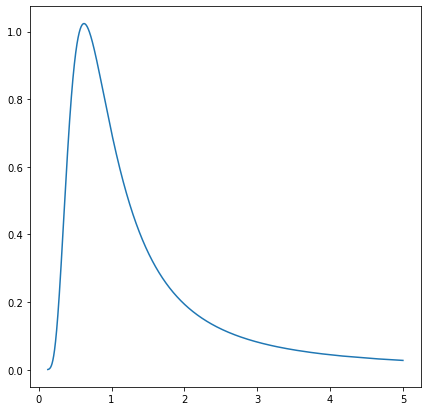

In [188]:
plt.plot(Temp[1000:-2],C[1000:-2])

In [189]:
C

array([        nan,         nan,         nan, ...,  0.02736189,
        0.00777702, -0.01180685])

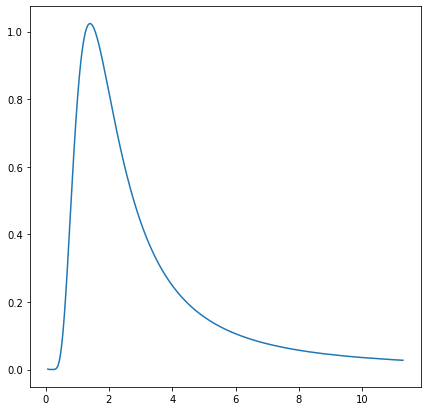

In [190]:
#plt.plot(Temp[3:-2]/Tk,C0[3:-2])
plt.plot(Temp[250:-2]/Tk,C[250:-2])

In [191]:
#Computing Wilson's ratio
B=np.linspace(1e-3,2e-3,50)
Temp=np.linspace(0.0005,5,40000)
kB=1
Jstar=Jfixed
Bmesh,Tmesh=np.meshgrid(B,Temp)
a=Bmesh/2.+J[k-20]/4-Jstar/4.
b=-Bmesh/2.-J[k-20]/4-Jstar/4.
c=Jstar/2.
E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
Z=np.exp(-E1/(kB*Tmesh))+np.exp(-E2/(kB*Tmesh))+2*np.exp(-(Jstar/4)/(kB*Tmesh))*np.cosh(Bmesh/(2*kB*Tmesh))
magnetization=kB*Tmesh*(np.gradient(Z,B,axis=1)/Z)
Chi=np.gradient(magnetization,B,axis=1)[:,0]


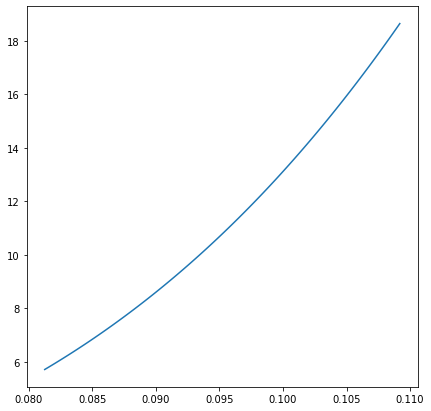

In [195]:
figure,ax=plt.subplots()
#ax.set_yscale('log')
R=(Temp[4:-2][280:-2]*Chi[4:-2][280:-2])/(C[4:-2][280:-2])

plt.plot((Temp[4:-2][280:-2]/Tk)[0:100],R[0:100])

In [196]:
R

array([5.71675397, 5.79657928, 5.87721061, ..., 4.54126829, 4.54158088,
       4.54173283])

In [197]:
R

array([5.71675397, 5.79657928, 5.87721061, ..., 4.54126829, 4.54158088,
       4.54173283])

$H=J\mathbf{S}\cdot\mathbf{s}+BS^{z}$

In [258]:
J=Jstar
B=np.linspace(5e-5,1e-1,5000)
Temp=np.linspace(8e-3,1,10000)
kB=1
Bmesh,Tmesh=np.meshgrid(B,Temp)
a=Bmesh/2.-J/4.
b=-Bmesh/2.-J/4.
c=J/2.
E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
Bmesh,Tmesh=np.meshgrid(B,Temp)
#cosTheta=Bmesh/np.sqrt(Bmesh**2+J**2/4.)
#ExpSz1=cosTheta
#ExpSz2=-cosTheta

In [ ]:
Z=2*np.exp((-J/4.)/(kB*Tmesh))*np.cosh(Bmesh/(2*kB*Tmesh))+np.exp(-E1/(kB*Tmesh))+np.exp(-E2/(kB*Tmesh))

In [ ]:
Z.shape

In [25]:
magnetization=kB*Tmesh*(np.gradient(Z,axis=1)/Z)
susceptibility=np.gradient(magnetization,axis=1)

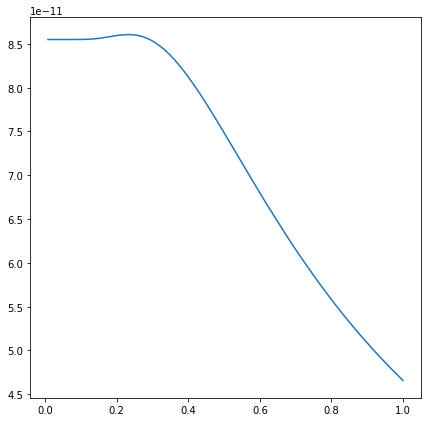

In [27]:
plt.plot(Temp,susceptibility[:,0])

In [16]:
Temp=np.linspace(2.9e-2,5000,100000)
kB=1
beta=1/(kB*Temp)
Jstar=Jfixed
J1=0#Jstar/2.
Ekstar=EFwvfAvg[k]-E_F
#Z_0=2*np.exp(-beta*Ekstar)*2*np.exp(-beta*Jstar/4.)*(np.cosh(beta*J1/2.)+np.cosh((beta/2)*np.sqrt(J1**2/4.+Jstar)))+(1+np.exp(-2*beta*Ekstar))*2*np.exp(-beta*Jstar/4.)*(1+np.cosh((beta/2.)*Jstar))
#dZ_dB=np.exp(-beta*Ekstar)*np.exp(-beta*Jstar/4.)*beta*(np.sinh(beta*J1/2.)+(J1/(np.sqrt(J1**2+Jstar**2)))*np.sinh((beta/2.)*np.sqrt(J1**2+Jstar**2)))
#d2Z_dB2=(1+np.exp(-2*beta*Ekstar))*np.exp(-beta*Jstar/4.)*(beta/2.+(1/Jstar)*np.sinh(beta*Jstar/2.))+np.exp(-beta*Ekstar)*np.exp(-beta*Jstar/4.)*((beta/2.)*np.cosh(beta*Jstar/2.)+(1/np.sqrt(J1**2+Jstar**2))*np.sinh((beta/2.)*np.sqrt(J1**2+Jstar**2))+(beta/2.)*(J1**2/(J1**2+Jstar**2))*np.cosh((beta/2.)*np.sqrt(J1**2+Jstar**2))-(J1**2/(J1**2+Jstar**2)**(3/2.))*np.sinh((beta/2.)*np.sqrt(J1**2+Jstar**2)))                                              

In [17]:
Chi=(1/(4*kB*Temp)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp)))/(1+np.cosh(Jstar/(2*kB*Temp)))

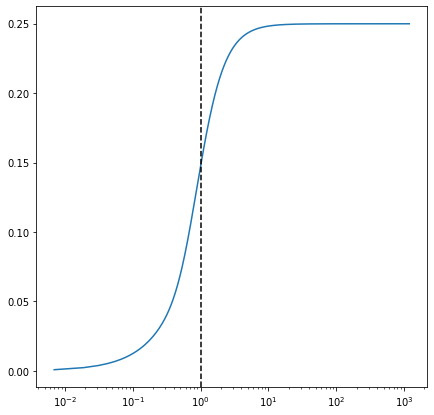

In [20]:
figure,ax=plt.subplots(1)
ax.set_xscale('log')
ax.plot(Temp/Tk,Chi*Temp)
ax.axvline(x=1,linestyle='--',color='k')

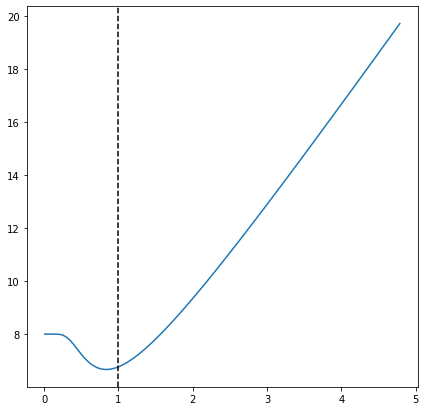

In [22]:
Temp=np.linspace(2.9e-2,20,100)
kB=1
beta=1/(kB*Temp)
Jstar=Jfixed
J1=0#Jstar/2.
Ekstar=EFwvfAvg[k]-E_F
Chi=(1/(4*kB*Temp)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp)))/(1+np.cosh(Jstar/(2*kB*Temp)))
figure,ax=plt.subplots(1)
#ax.set_xscale('log')
ax.plot(Temp/Tk,1/(Chi*Tk))
ax.axvline(x=1,linestyle='--',color='k')

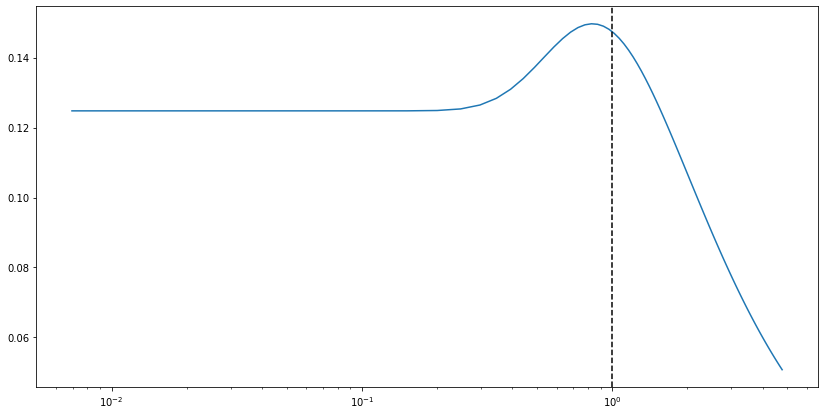

In [70]:
figure,ax=plt.subplots(1)
ax.set_xscale('log')
ax.plot(Temp/Tk,Chi*Tk)
ax.axvline(x=1,linestyle='--',color='k')

In [73]:
Chi[0]*Tk/(0.413/4)

1.2088367696651348

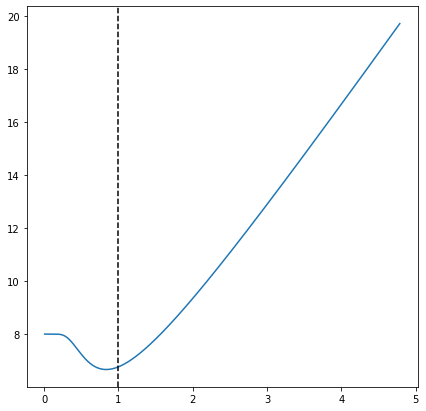

In [530]:
Temp=np.linspace(2.9e-2,20,10000)
kB=1
beta=1/(kB*Temp)
Chi=(1/(4*kB*Temp)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp)))/(1+np.cosh(Jstar/(2*kB*Temp)))
Jstar=Jfixed
J1=0#Jstar/2.
Ekstar=EFwvfAvg[k]-E_F
figure,ax=plt.subplots(1)
ax.plot(Temp/Tk,1/(Chi*Tk))
ax.axvline(x=1,linestyle='--',color='k')

In [360]:
Chi*Temp

array([0.00086625, 0.00092591, 0.00098557, ..., 0.24288792, 0.2428893 ,
       0.24289069])

In [ ]:
2*np.exp(Jstar/(4*kB*T))*(np.cosh(B[j]/(2*kB*T))+np.cosh(np.sqrt(B[j]**2+Jstar**2)/(2*kB*T)))

$E_{1}=\frac{1}{2}(-\frac{J}{2}+\sqrt{B^{2}+J^{2}})$, $E_{2}=\frac{1}{2}(-\frac{J}{2}-\sqrt{B^{2}+J^{2}})$<br>
$Z(B)=2\exp(\beta\frac{J}{4})\left[\cosh(\beta\frac{B}{2})+\cosh(\frac{\beta}{2}(\sqrt{B^{2}+J^{2}}))\right]$<br>
$\bar{Z}(B)=2\exp(-\beta\epsilon^{*})Z(B+J^{*})+(1+\exp(-2\beta\epsilon^{*}))Z(B)$<br>
$\frac{d\bar{Z}(B)}{dB}=(1+\exp(-2\beta\epsilon^{*}))\exp(\beta\frac{J}{4})\beta\left[\sinh(\beta\frac{B}{2})
+\frac{B}{\sqrt{B^{2}+J^{2}}}\sinh(\frac{\beta}{2}\sqrt{B^{2}+J^{2}})\right]$<br>
$+\exp(-\beta\epsilon^{*})\exp(-\beta\frac{J}{4})\beta\left[\sinh(\beta\frac{B+J^{*}}{2})+\frac{B+J^{*}}{\sqrt{(B+J^{*})^{2}+J^{2}}}\sinh(\frac{\beta}{2}\sqrt{(B+J^{*})^{2}+J^{2}})\right]$<br>
$M=\frac{k_{B}T}{Z(B)}\frac{dZ(B)}{dB}$<br>
<br>
$\frac{dM}{dB}=-\frac{k_{B}T}{(Z(B))^{2}}\left(\frac{dZ(B)}{dB}\right)^{2}+\frac{k_{B}T}{Z(B)}\frac{d^{2}Z(B)}{dB^{2}}$<br>
<br>
$\lim_{B\to 0}k_{B}T\frac{d^{2}Z(B)}{dB^{2}}=(1+\exp(-2\beta\epsilon^{*}))\exp(\beta\frac{J}{4})\left[\frac{\beta}{2}+\frac{1}{J}\sinh(\frac{\beta}{2}J)\right]$<br>
$+\exp(-\beta\epsilon^{*})\exp(\beta\frac{J}{4})\left[\frac{\beta}{2}\cosh(\beta\frac{J^{*}}{2})+\frac{1}{\sqrt{(J^{*})^{2}+J^{2}}}\sinh(\frac{\beta}{2}\sqrt{(J^{*})^{2}+J^{2}})-\frac{(J^{*})^{2}}{((J^{*})^{2}+J^{2})^{3/2}}\sinh(\frac{\beta}{2}\sqrt{(J^{*})^{2}+J^{2}})+\frac{\beta}{2}\frac{(J^{*})^{2}}{(J^{*})^{2}+J^{2}}\cosh(\frac{\beta}{2}\sqrt{(J^{*})^{2}+J^{2}})\right]$<br>

$\lim_{B\to 0}\frac{dM}{dB}=\frac{(\frac{\beta}{4}+\frac{1}{2J}\sinh(\frac{\beta}{2}J))(1+\cosh(\frac{\beta}{2}J))}{(1+\cosh(\frac{\beta}{2}J))^{2}}-\frac{\beta}{4}\frac{1}{(1+\cosh(\frac{\beta}{2}J))^{2}}$<br>
$=\frac{\frac{\beta}{4}\cosh(\frac{\beta}{2}J)+\frac{1}{2J}\sinh(\frac{\beta}{2}J)(1+\cosh(\frac{\beta}{2}J))}{(1+\cosh(\frac{\beta}{2}J))^{2}}$

In [53]:
Temp=np.linspace(2.9e-2,10000,100000)#np.linspace(2.39e-2,20,10000)
Chi1=np.zeros(len(Temp),dtype='int64')
Chi2=np.zeros(len(Temp),dtype='int64')
kB=1
Jstar=Jfixed

In [54]:
Jstar

16.738797816125086

In [55]:
Chi1=(1/(4*kB*Temp))*np.cosh(Jstar/(2*kB*Temp))+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp))*(1+np.cosh(Jstar/(2*kB*Temp)))
Chi2=(1+np.cosh(Jstar/(2*kB*Temp)))**2
Chi=Chi1/Chi2+(1/Chi2)*(1/(4*Temp))

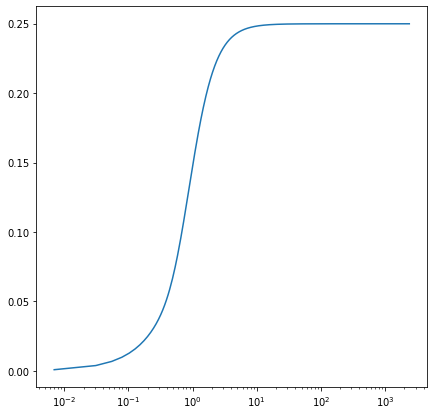

In [56]:
figure,ax=plt.subplots()
ax.set_xscale('log')
ax.plot(Temp/Tk,Chi*Temp)
#plt.xlim([0,5])
#plt.ylim([0,0.20])

$Z=2\exp(\beta\frac{J}{4})\left[1+\cosh(\frac{\beta}{2}J)\right]=\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})$<br>
$\frac{dZ}{dT}=-\frac{3J}{4k_{B}T^{2}}\exp(\frac{3J}{4 k_{B}T})+\frac{3J}{4k_{B}T^{2}}\exp(-\frac{J}{4 k_{B}T})$<br>
$\frac{d^{2}Z}{dT^{2}}=\frac{6J}{4k_{B}T^{3}}\exp(\frac{3J}{4 k_{B}T})+\frac{9J^{2}}{16k^{2}_{B}T^{4}}\exp(\frac{3J}{4 k_{B}T})-\frac{6J}{4k_{B}T^{3}}\exp(-\frac{J}{4 k_{B}T})+\frac{3J^{2}}{16k^{2}_{B}T^{4}}\exp(-\frac{J}{4 k_{B}T})$<br>

$\frac{k_{B}T^{2}}{Z}\frac{d^{2}Z}{dT^{2}}=\frac{3J}{2T}\frac{\exp(\frac{3J}{4 k_{B}T})-\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}+\frac{J^{2}}{16k_{B}T^{2}}\frac{9\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}$<br>

$\frac{2k_{B}T}{Z}\frac{dZ}{dT}=-\frac{3J}{2T}\frac{\exp(\frac{3J}{4 k_{B}T})-\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}$<br>

$-\frac{k_{B}T^{2}}{Z^{2}}\left(\frac{dZ}{dT}\right)^{2}=-\frac{9J^{2}}{16k_{B}T^{2}}\frac{(\exp(-\frac{J}{4 k_{B}T})-\exp(\frac{3J}{4 k_{B}T}))^{2}}{(\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T}))^{2}}$

$C=\frac{d}{dT}(k_{B}T^{2}\frac{1}{Z}\frac{dZ}{dT})=-\frac{k_{B}T^{2}}{Z^{2}}\left(\frac{dZ}{dT}\right)^{2}+\frac{2k_{B}T}{Z}\frac{dZ}{dT}+\frac{k_{B}T^{2}}{Z}\frac{d^{2}Z}{dT^{2}}$<br>

$C=\frac{J^{2}}{16k_{B}T^{2}}\frac{9\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}{\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T})}-\frac{9J^{2}}{16k_{B}T^{2}}\frac{(\exp(-\frac{J}{4 k_{B}T})-\exp(\frac{3J}{4 k_{B}T}))^{2}}{(\exp(\frac{3J}{4 k_{B}T})+3\exp(-\frac{J}{4 k_{B}T}))^{2}}$

In [536]:
Temp=np.linspace(2.9e-2,1000,100000)
boltz1=np.exp(3*Jstar/(4*kB*Temp))
boltz2=np.exp(-Jstar/(4*kB*Temp))
scale=Jstar**2/(16*kB*Temp**2)

In [537]:
boltz2

array([2.14444266e-63, 2.51177737e-47, 8.12984247e-38, ...,
       9.95823961e-01, 9.95824003e-01, 9.95824044e-01])

In [538]:
scale

array([2.08224846e+04, 1.15133992e+04, 7.29361980e+03, ...,
       1.75124100e-05, 1.75120598e-05, 1.75117095e-05])

In [539]:
C=scale*(9*boltz1+3*boltz2)/(boltz1+3*boltz2)-9*scale*((boltz1-boltz2)/(boltz1+3*boltz2))**2

In [540]:
C

array([ 0.00000000e+00, -1.45519152e-11,  0.00000000e+00, ...,
        5.29759980e-05,  5.29749341e-05,  5.29738703e-05])

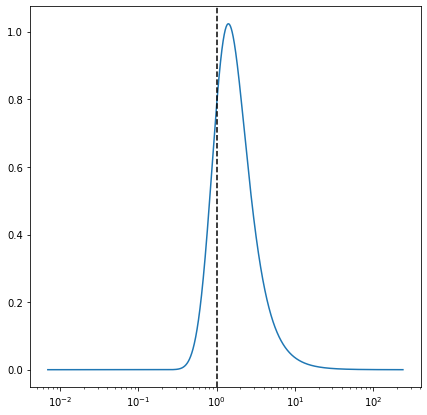

In [541]:
figure,ax=plt.subplots()
ax.set_xscale('log')
ax.plot((Temp/Tk),C)
ax.axvline(x=1,linestyle='--',color='k')

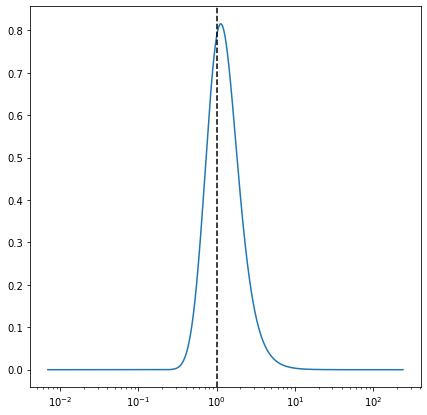

In [543]:
figure,ax=plt.subplots()
ax.set_xscale('log')
ax.plot((Temp/Tk),(C/Temp)*Tk)
ax.axvline(x=1,linestyle='--',color='k')

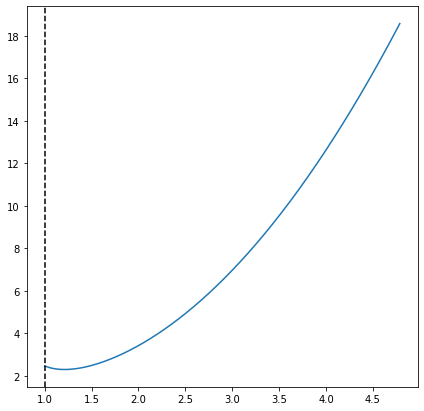

In [440]:
figure,ax=plt.subplots()
ax.plot((Temp/Tk)[2078:],(1/(C/(Temp*Chi))[2078:])*(4*np.pi**2/3))
ax.axvline(x=1,linestyle='--',color='k')

In [443]:
(1/(C/(Temp*Chi))[2078:])*(4*np.pi**2/3)>2

array([ True,  True,  True, ...,  True,  True,  True])

In [435]:
np.where(Temp/Tk>1)

(array([2078, 2079, 2080, ..., 9997, 9998, 9999]),)

In [420]:
C

array([0.        , 0.        , 0.        , ..., 0.17222584, 0.17218956,
       0.1721533 ])

$H^{*}_{K}=J^{*}\mathbf{S}\cdot\mathbf{s}+\sum_{l=N,m=1}^{j^{*},n_{l}}J_{l}S^{z}s^{z}_{l,m}
+\sum_{l=N,m=1}^{j^{*},n_{l}}\epsilon_{l}(\hat{n}_{l,m,\uparrow}+\hat{n}_{l,m,\downarrow})$<br>
$\exp(-\beta H^{*}_{K})=\prod_{l=N,m=1}^{j^{*},n_{l}}\exp(-\beta\epsilon_{l}(\hat{n}_{l,m,\uparrow}+\hat{n}_{l,m,\downarrow}))\times\exp(-\beta(J^{*}\mathbf{S}\cdot\mathbf{s}+\sum_{l=N,m=1}^{j^{*},n_{l}}J_{l}S^{z}s^{z}_{l,m}))$<br>

$\begin{pmatrix}-\frac{J^{*}}{4}+\sum_{l=N,m=1}^{j^{*},n_{l}}\frac{J_{l}}{2}s^{z}_{l,m} & \frac{J^{*}}{2}\\ 
\frac{J^{*}}{2} & -\frac{J^{*}}{4}-\sum_{l=N,m=1}^{j^{*},n_{l}}\frac{J_{l}}{2}s^{z}_{l,m}\end{pmatrix}=-\frac{J^{*}}{4}+\sigma^{z}h_{z}+\frac{J^{*}}{2}\sigma_{x}=-\frac{J^{*}}{4}+A\boldsymbol{\sigma}\cdot\mathbf{\hat{n}}, A=\sqrt{h^{2}_{z}+\frac{(J^{*})^{2}}{4}},\cos\theta=\frac{h_{z}}{\sqrt{h^{2}_{z}+\frac{(J^{*})^{2}}{4}}}$<br>
$\exp(-\beta(J^{*}\mathbf{S}\cdot\mathbf{s}+\sum_{l=N,m=1}^{j^{*},n_{l}}J_{l}S^{z}s^{z}_{l,m}))=2\exp(-\beta\frac{J^{*}}{4})\cosh\left(\sum_{l=N,m=1}^{j^{*},n_{l}}\frac{\beta J_{l}}{2}s^{z}_{l,m}\right)+\exp(\beta\frac{J^{*}}{4})\exp\left(-\beta A\mathbf{\sigma}\cdot\hat{\mathbf{n}}\right)=2\exp(-\beta\frac{J^{*}}{4})\cosh\left(\sum_{l=N,m=1}^{j^{*},n_{l}}\frac{\beta J_{l}}{2}s^{z}_{l,m}\right)+\exp(\beta\frac{J^{*}}{4})\left[\cosh(\beta A)+\boldsymbol{\sigma}\cdot\hat{n}\sinh(\beta A)\right]$<br>

$Tr_{imp+cloud}(\exp(-\beta(J^{*}\mathbf{S}\cdot\mathbf{s}+\sum_{l=N,m=1}^{j^{*},n_{l}}J_{l}S^{z}s^{z}_{l,m})))\approx \exp(\beta\frac{J^{*}}{4})\exp(\beta A)$<br>

$-k_{B}T\log(Tr_{imp+cloud}(\exp(-\beta H^{*}_{K}))\approx \sum_{l,m}\epsilon_{l}(\hat{n}_{l,m,\uparrow}+\hat{n}_{l,m,\downarrow})-\frac{J^{*}}{4}-\frac{J^{*}}{2}\sqrt{1+\frac{4h_{z}^{2}}{(J^{*})^{2}}}$<br>
$\sum_{l,m}\epsilon_{l}(\hat{n}_{l,m,\uparrow}+\hat{n}_{l,m,\downarrow})-\frac{3J^{*}}{4}-\frac{h^{2}_{z}}{J^{*}}$

### Effective Hamiltonian for the Local Fermi liquid at IR fixed point
$H_{LFL}=\sum_{l,m}\epsilon_{l}(\hat{n}_{l,m,\uparrow}+\hat{n}_{l,m,\downarrow})-\sum_{l,l',m,m'}f_{ll'}s^{z}_{l,m}s^{z}_{l,m'}, f_{ll'}=\frac{J_{l}J_{l'}}{J^{*}}, s^{z}_{l,m}=\frac{1}{2}(\hat{n}_{l,m,\uparrow}-\hat{n}_{l,m,\downarrow})$

$\frac{\delta\mathcal{E}}{\delta n_{l,m,\sigma}}=\epsilon_{l}+\sum_{l',m'}\frac{J_{l}J_{l'}}{J^{*}}\delta n_{l',m',-\sigma}$, $~~~~~~~\delta n_{l',m',-\sigma}=\frac{\partial f(\epsilon_{l'})}{\partial T}dT$

$H_{1-LFL}=\sum_{l,m,\sigma}(\epsilon_{l}+\Sigma_{\sigma,l}+\sigma B )\hat{n}_{l,m,\sigma}$

In [9]:
lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))
#dispersion of electronic states residing outside the Fermi energy
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)

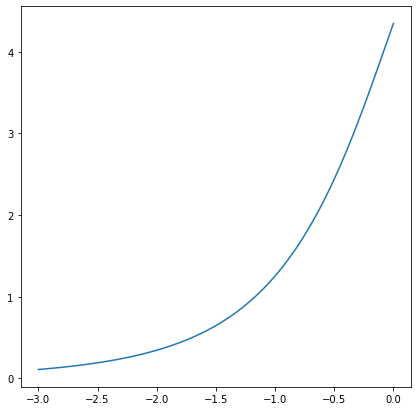

In [10]:
plt.plot(np.log(lambdaF/Lambda0),EFwvfAvg-E_F)

In [11]:
EFwvfAvg-E_F

array([4.3433019 , 4.34289476, 4.34248759, ..., 0.10805831, 0.10804639,
       0.10803447])

In [12]:
Temp=np.linspace(2.9e-2,20,5000)

In [13]:
Temp[1]-Temp[0]

0.003994998999799961

In [14]:
ELambdaGrid,TempGrid=np.meshgrid(EFwvfAvg[0:k+1],Temp)

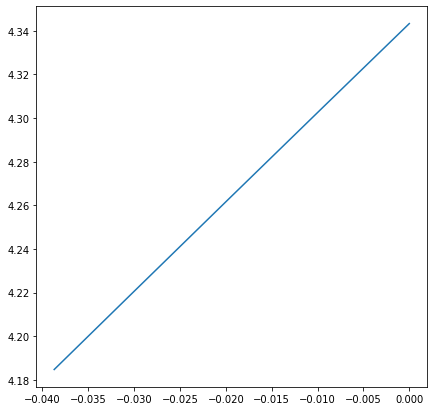

In [15]:
plt.plot(np.log(lambdaF[0:k+1]/Lambda0),EFwvfAvg[0:k+1]-E_F)

In [16]:
FDdistGrid=(1+np.exp(-ELambdaGrid/(TempGrid)))

In [17]:
dFDdist_DT=np.gradient(FDdistGrid,Temp,axis=0)

In [18]:
#quasi particle density for states residing outside Fermi energy 
delta_n = dFDdist_DT[0]*(Temp[1]-Temp[0])

In [19]:
# Kondo coupling
J_LFL=J[0:k+1]

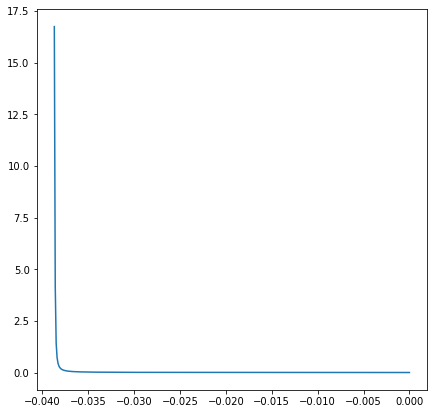

In [20]:
plt.plot(np.log(lambdaF[0:k+1]/Lambda0),J_LFL)

In [21]:
#computing the 1-p self energy
Sigma=np.zeros(k+1)*0.0
for l in range(k+1):
    Sigma[l]=(J_LFL[l]*(np.sum(J_LFL*delta_n)-(J_LFL[l]*delta_n[l])))/(J_LFL[k])

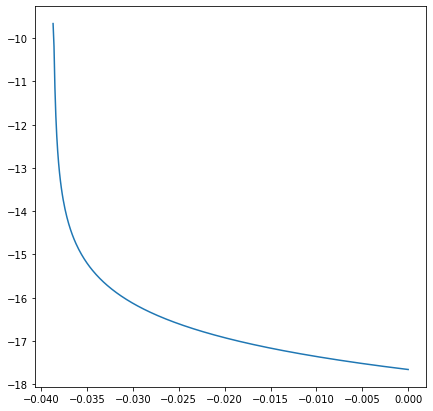

In [23]:
figure,ax=plt.subplots(1)
plt.plot(np.log(lambdaF[0:k+1]/Lambda0),np.log(Sigma))

In [24]:
#computing the renormalized quasiparticle energies
B=np.linspace(1e-3,2e-3,10)
Ekbare=(EFwvfAvg-E_F)[0:k+1]
Bmesh,Ekmesh=np.meshgrid(B,Ekbare)
Bmesh,SigmaMesh=np.meshgrid(B,Sigma)
EkrenUp=Ekmesh+SigmaMesh+Bmesh 
EkrenDown=Ekmesh-SigmaMesh-Bmesh

In [25]:
EkrenUp.shape

(388, 10)

In [26]:
#computing Free energy function
Z=np.zeros([len(Temp),len(B)])
Z.shape
Bgrid,TempGrid=np.meshgrid(B,Temp)  

In [407]:
EkrenUp[0],Ekbare[0]

(0.002000021392881767, 4.343301902260523)

In [408]:
#B=np.linspace(1e-3,2e-3,50)
#Temp=np.linspace(0.008,20,10000)#np.linspace(0.008,5,10000)
kB=1
Jstar=Jfixed
#Bmesh,Tmesh=np.meshgrid(B,Temp)
Temp=np.linspace(1e-1,20,5000)#np.linspace(2.9e-2,20,5000)
#a=Bmesh/2.+J[k-20]/4-Jstar/4.
#b=-Bmesh/2.-J[k-20]/4-Jstar/4.
#c=Jfixed/2.
#E1=0.5*(a+b+np.sqrt((a-b)**2+4*c**2))
#E2=0.5*(a+b-np.sqrt((a-b)**2+4*c**2))
#Z=(np.exp(-E1/(kB*Temp))+np.exp(-E2/(kB*Temp))+2*np.exp(-(Jstar/4)/(kB*Temp)))
for i in range(len(Temp)):
    T=Temp[i]
    for j in range(len(B)):
        EkrenUp=Sigma+B[j]
        EkrenDown=Sigma-B[j]
        Z1=2*np.exp(Jstar/(4*kB*T))*(np.cosh(B[j]/(2*kB*T))+np.cosh(np.sqrt(B[j]**2+Jstar**2)/(2*kB*T)))
        Z[i][j]=np.log(Z1)#np.log(1+np.exp(-EkrenUp[k]/(kB*T)))+np.log(1+np.exp(-EkrenDown[k]/(kB*T)))+np.log(Z1)#2*np.pi*np.sqrt(0.2)*(np.log(np.exp(-(EkrenUp[k])/(T))+1)+np.log((np.exp(-(EkrenDown[k])/(T))+1)))#+np.log(Z)

IndexError: index 10 is out of bounds for axis 0 with size 10

In [47]:
M=(np.gradient(Z,B,axis=1))*TempGrid
Chi=np.gradient(Z,B,axis=1)

In [48]:
Chi[:,0].shape

(5000,)

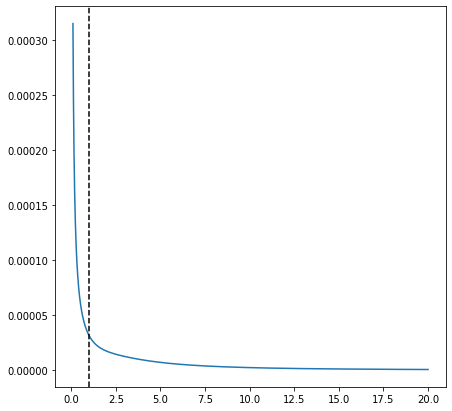

In [49]:
figure,ax=plt.subplots(1)
ax.plot(Temp,Chi[:,0])
ax.axvline(x=1,linestyle='--',color='k')

In [699]:
#Free energy at zero magnetic field
F0=np.zeros(len(Temp))
for i in range(len(Temp)):
    T=Temp[i]
    Ekren=Ekbare+Sigma
    F0[i]=2*np.sum(np.log(np.exp(-Ekren/(T))+1))

In [700]:
C=np.gradient(np.gradient(F0,T)*Temp*Temp,Temp)

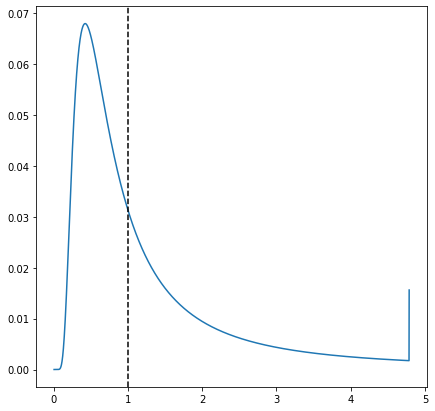

In [708]:
figure,ax=plt.subplots(1)
ax.plot(Temp/Tk,C)
ax.axvline(x=1,linestyle='--',color='k')

In [281]:
Tk=4.178

In [282]:
EFwvfAvg-E_F

array([4.3433019 , 4.34289476, 4.34248759, ..., 0.10805831, 0.10804639,
       0.10803447])

In [376]:
Tk

0.7435289126705619

In [471]:
Temp=np.linspace(0.001,5000,3000)
Chi=np.zeros(len(Temp))*0.0
factor=25#25
Tkondo=Tk*factor*0.1
Ek=np.linspace(-4,4,45500)*factor
FD=np.zeros(100)
print(Tkondo)
for i in range(len(Temp)):
    T=Temp[i]
    FD=1/(np.exp(Ek/T)+1)
    Chi[i]=(2/Tkondo)*np.sum(-(1/(np.pi))*(FD*((Ek/T)/(((Ek/T)**2+1)**2))*((Ek[1]-Ek[0])/T)))

1.8588222816764048


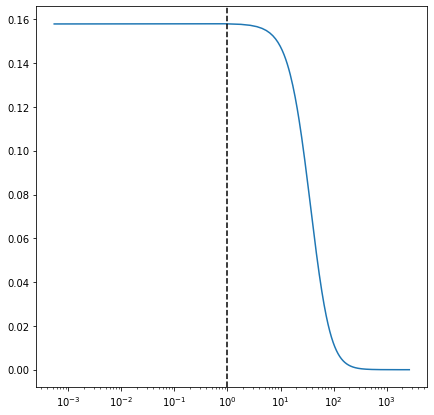

In [474]:
figure,ax=plt.subplots(1)
ax.set_xscale('log')
ax.plot(Temp/Tkondo,Chi*Tkondo)
ax.axvline(x=1,linestyle='--',color='k')

$f=\frac{1}{\exp(\omega)+1}, \omega=\frac{\epsilon}{k_{B}T}$, $\frac{df}{d\omega}=-\frac{\exp(\omega)}{(1+\exp(\omega))^{2}}$, $\frac{d^{2}f}{d\omega^{2}}=-\frac{\exp(\omega)}{(1+\exp(\omega))^{2}}+2\frac{\exp(2\omega)}{(1+\exp(\omega))^{3}}$,<br>
$d\omega = -\frac{\omega}{T}dT$ , $\frac{d}{dT}=-\frac{\omega}{T}\frac{d}{d\omega}$, $\frac{d^{2}}{dT^{2}}=\frac{\omega^{2}}{T^{2}}\frac{d}{d\omega}+\frac{\omega}{T^{2}}\frac{d}{d\omega}+\frac{\omega^{2}}{T^{2}}\frac{d^{2}}{d\omega^{2}}$ <br>
$\frac{d^{2}f}{dT^{2}}=\frac{\omega^{2}}{T^{2}}\frac{df}{d\omega}+\frac{\omega}{T^{2}}\frac{df}{d\omega}+\frac{\omega^{2}}{T^{2}}\frac{d^{2}f}{d\omega^{2}}=-2\frac{\omega^{2}}{T^{2}}\frac{\exp(\omega)}{1+\exp(\omega)}f-\frac{\omega}{T^{2}}\frac{\exp(\omega)}{(1+\exp(\omega))^{2}}+\frac{2\omega^{2}}{T^{2}}\frac{\exp(2\omega)}{(1+\exp(\omega))^{3}}$<br>

0.7435289126705619


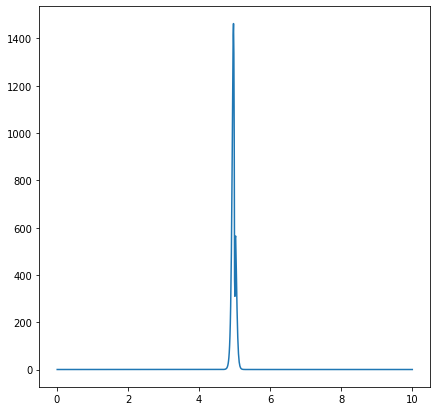

In [502]:
Temp=np.linspace(0.02,10,1000)
gamma=np.zeros(len(Temp))*0.0
factor=1#25
Tkondo=(Tk)*factor
Ek=np.linspace(-4,4,1000)*factor

print(Tkondo)
for i in range(1):
    T=Temp[i+1]
    omega=Ek/T
    FD_T2=-2*((omega*omega)/T**2-omega/T**2)*(np.exp(omega)/((1+np.exp(omega))*(1+np.exp(omega))))+2*((omega*omega)/T**2)*np.exp(2*omega)/((1+np.exp(omega))*(1+np.exp(omega))*(1+np.exp(omega)))   
    arctan=np.arctan(1/omega)
#plt.plot(Temp,FD_T2)
plt.plot(Temp,FD_T2*arctan)

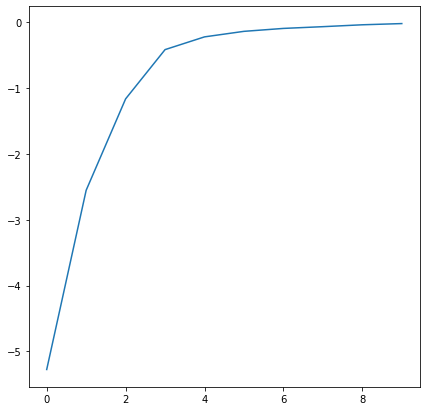

In [468]:
plt.plot(gamma)